# Example notebook for the functions contained into plot.py()

## Bands

`read_electron_band` reads band output and saves data as into a `BandStructure` object. The `plot_electron_band` function plots the object.

Warnings message: Please ignore it when a 2D plot is used. Useful when converting the object into pymatgen formats.

In [1]:
import CRYSTALpytools.plot as cfplt

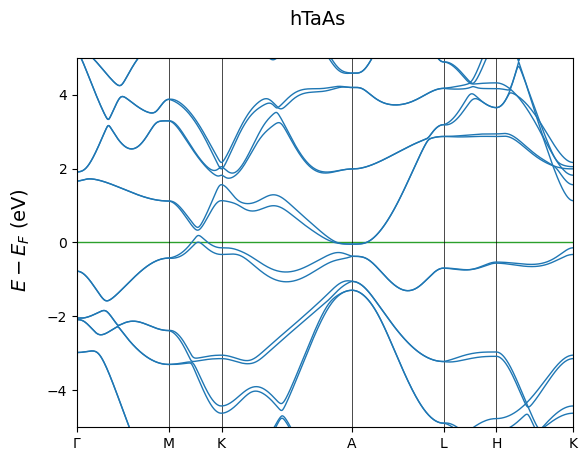

In [2]:
fig, ax = cfplt.plot_electron_bands(
    'hTaAs_lda_bande44.BAND', energy_range=[-5, 5],
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs', fermi_color='tab:green')

Alternatively, for a single band structure plot, you can use `electronics.ElectronBand` object for quick setups, plot and other manipulations.
In either way, you can change the defaults unit, bands color, line style, line width, range of k points, color of the Fermi level, and figsize as follows:

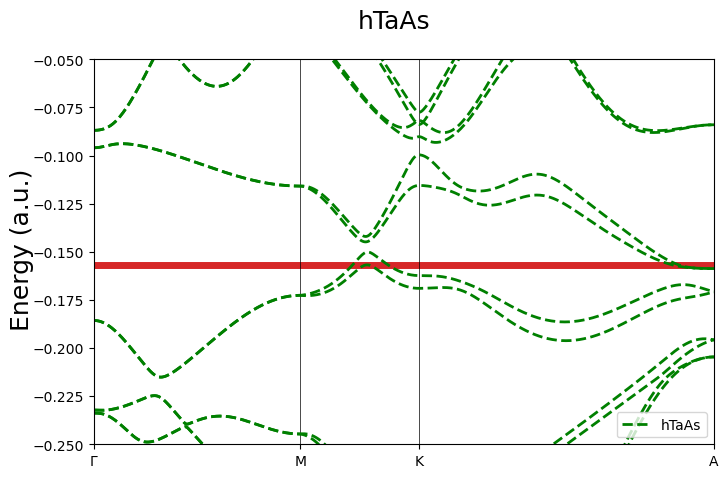

In [3]:
from CRYSTALpytools.electronics import ElectronBand

bandobj = ElectronBand.from_file('hTaAs_lda_bande44.BAND')

fig, ax = bandobj.plot(
    unit='a.u.', k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    energy_range=[-0.25, -0.05], k_range=['Gamma', 'A'],
    band_label='hTaAs', band_color='green', band_linestyle='--', band_linewidth=2,
    fermi_level=bandobj.efermi, fermi_color='tab:red', fermi_linestyle='-', fermi_linewidth=5,
    title='hTaAs', figsize=(8,5), fontsize=18)

### Multiple Band Structures

With the `plot_cry_bands()` fuction you can plot multiple band structures in two ways: Overlapping the structures, and side by side plots.

#### Overlapped Plots

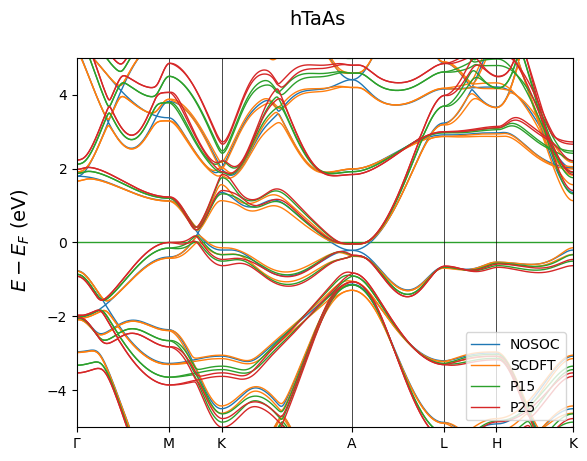

In [4]:
Data = ['hTaAs_lda_noso_bande.band', 'hTaAs_lda_bande44.BAND',
        'hTaAs_lda_P15_bande.band', 'hTaAs_lda_P25_bande.band',]

fig, ax = cfplt.plot_electron_bands(
    *Data, mode='multi', energy_range=[-5, 5], title='hTaAs',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    band_label=['NOSOC', 'SCDFT', 'P15', 'P25']
)

As for the single band plots the default bands color, line style, line width, range of k points, Fermi level color, and figsize:

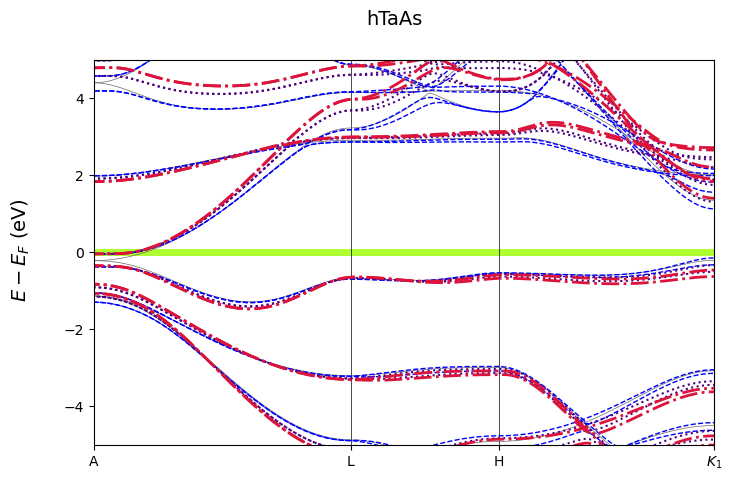

In [5]:
fig, ax = cfplt.plot_electron_bands(
    *Data, mode='multi', energy_range=[-5, 5], k_range=['A', '$K_1$'],
    title='hTaAs', figsize=(8,5),
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', '$K_1$'],
    band_label=['NOSOC', 'SCDFT', 'P15', 'P25'],
    band_color=['dimgrey', 'blue', 'indigo', 'crimson'],
    band_linestyle=['-','--','dotted','dashdot'],
    band_linewidth=[0.5,1,1.5,2], fermi_color='greenyellow', fermi_linewidth=5,
    legend=None
)

#### Side by Side Plots

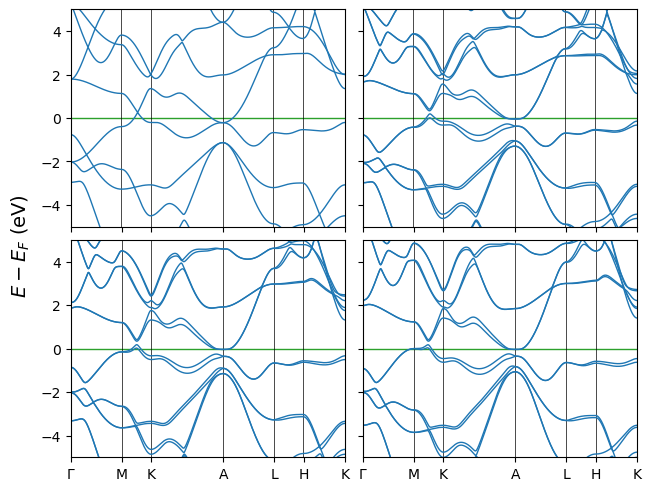

In [6]:
fig, ax = cfplt.plot_electron_bands(*Data, mode='compare', energy_range=[-5, 5],
                                    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'])

As seen for the overlapped structures, we can change bands color, line style, line width, color of the fermi level and figsize. In addition you'll be able to change the display scheme 

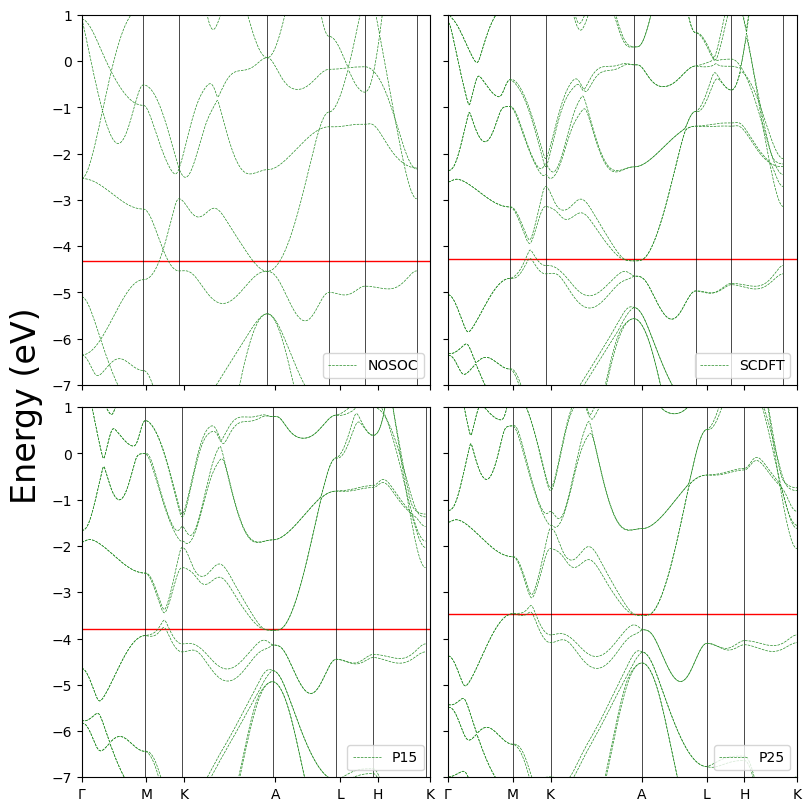

In [7]:
fermi = [ElectronBand.from_file(d).efermi for d in Data]

fig, ax = cfplt.plot_electron_bands(
    *Data, mode='compare', not_scaled=True, energy_range=[-7, 1],
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    band_label=['NOSOC', 'SCDFT', 'P15', 'P25'],
    band_color='forestgreen', band_linestyle='--', band_linewidth=0.5,
    fermi_level=fermi, fermi_color='red', figsize=(8,8), layout=(2,2), fontsize=24
)

### Doss

`CRYSTALpytools.plot.plot_electron_dos()` function will also give you the opportunity to plot a the Density of States of the system using the following syntax:

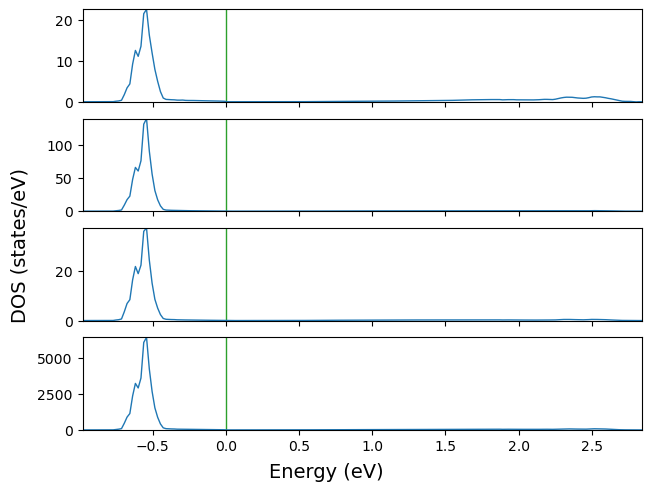

In [8]:
fig, ax = cfplt.plot_electron_doss('doss_96.DOSS', sharey=False)

Similar to band structure plot, for a single system `CRYSTALpytools.electronics.ElectronDOS` offers an object oriented way for data visualization. Either way supports the further customization of DOSS plots:

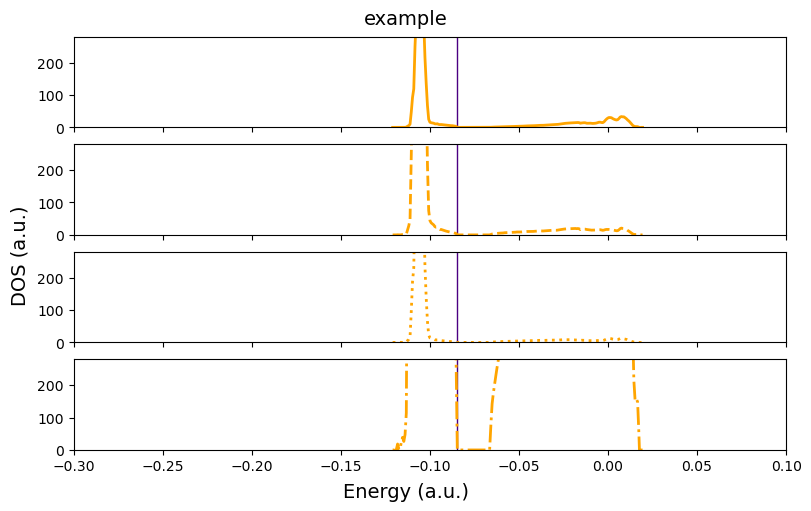

In [9]:
from CRYSTALpytools.electronics import ElectronDOS

obj = ElectronDOS.from_file('doss_96.DOSS')

fig, ax = cfplt.plot_electron_doss(
    obj, title='example', figsize=(8,5), energy_range=[-0.3,0.1], dos_range=[0, 280],
    dos_color='orange', dos_linestyle=['-','--','dotted','dashdot'], dos_linewidth=2,
    unit='a.u.', fermi_level=obj.efermi, fermi_color='indigo' )

Furthermore you can also plot a selected number of projections whit a list of numbers where 1 will correspond to the first projection in the file

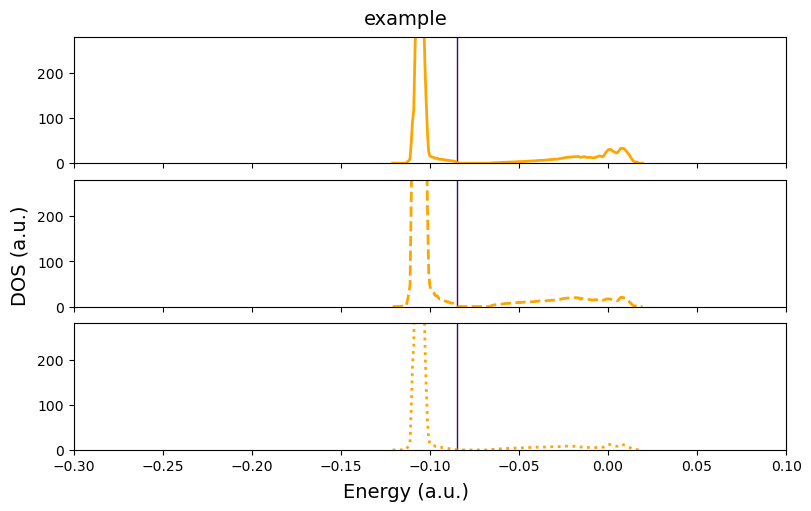

In [10]:
fig, ax = cfplt.plot_electron_doss(
    obj, title='example', figsize=(8,5), energy_range=[-0.3,0.1], dos_range=[0, 280],
    dos_color='orange', dos_linestyle=['-','--','dotted'], dos_linewidth=2,
    unit='a.u.', fermi_level=obj.efermi, fermi_color='indigo', prj=[1,2,3])

If you prefer all of the projection can be plotted into a single plot as follows:

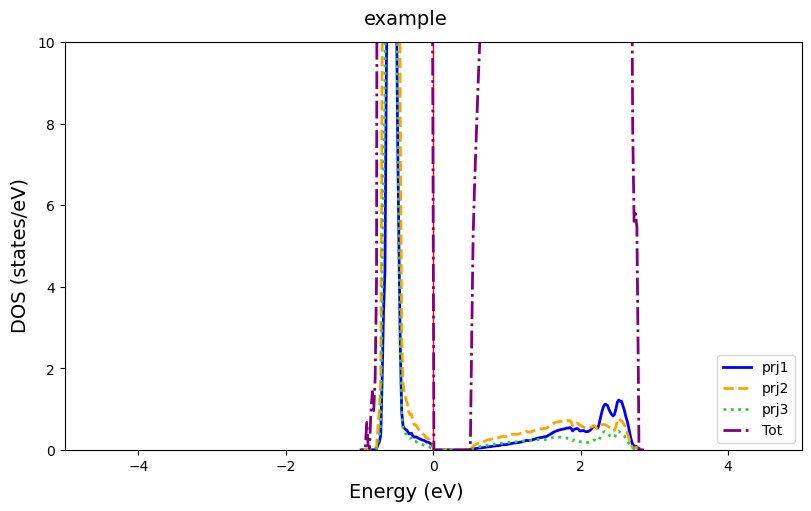

In [11]:
fig, ax = cfplt.plot_electron_doss(
    obj, title='example', unit='eV', energy_range=[-5,5], dos_range=[0,10],
    overlap=True, dos_color=['blue', 'orange', 'limegreen','purple'],
    dos_linestyle=['-','--','dotted','dashdot'], dos_linewidth=2,
    dos_label=['prj1', 'prj2', 'prj3', 'Tot'], fermi_color='r', figsize=(8,5))

As before you can also plot a restricted number of projections: 

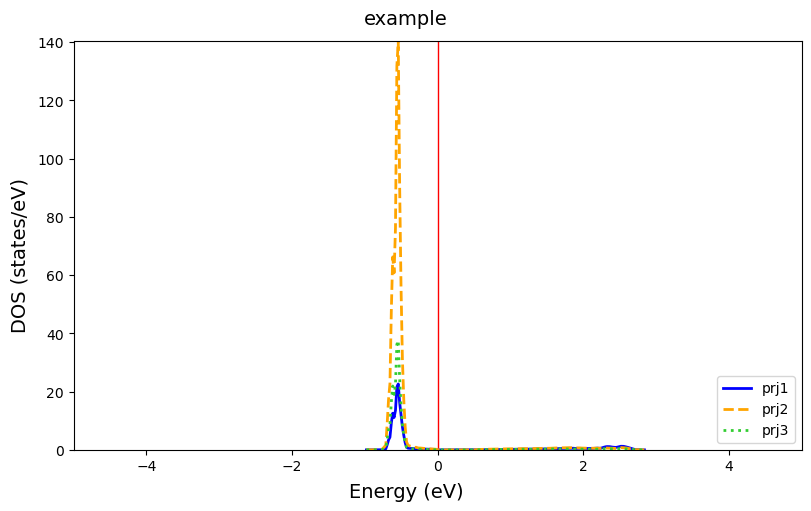

In [12]:
fig, ax = cfplt.plot_electron_doss(
    obj, title='example', unit='eV', energy_range=[-5,5],
    overlap=True, dos_color=['blue', 'orange', 'limegreen'],
    dos_linestyle=['-','--','dotted'], dos_linewidth=2, prj=[1,2,3],
    dos_label=['prj1', 'prj2', 'prj3'],fermi_color='r', figsize=(8,5)
)

In case of an open shell calculations you can use the beta (default: 'up') keyword to customize your plot as follows:

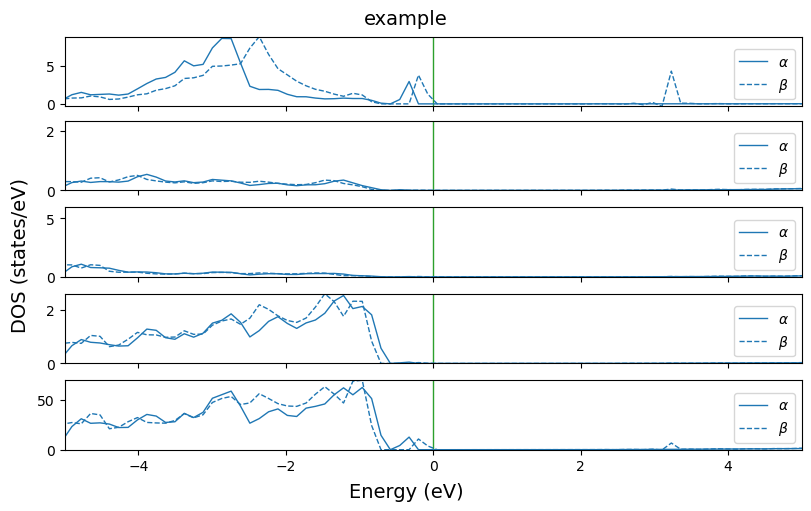

In [16]:
fig, ax = cfplt.plot_electron_doss('doss_ito-cu.DOSS', title='example', 
                                   figsize=(8, 5), energy_range=[-5, 5], sharey=False)

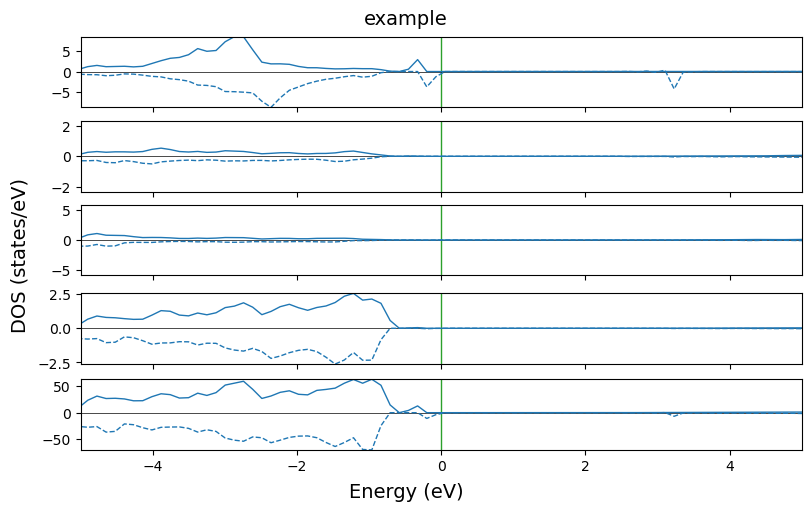

In [17]:
fig, ax = cfplt.plot_electron_doss('doss_ito-cu.DOSS', title='example', beta='down', legend=None,
                                   figsize=(8, 5), energy_range=[-5, 5], sharey=False)

The same option is also available for overlap=True:

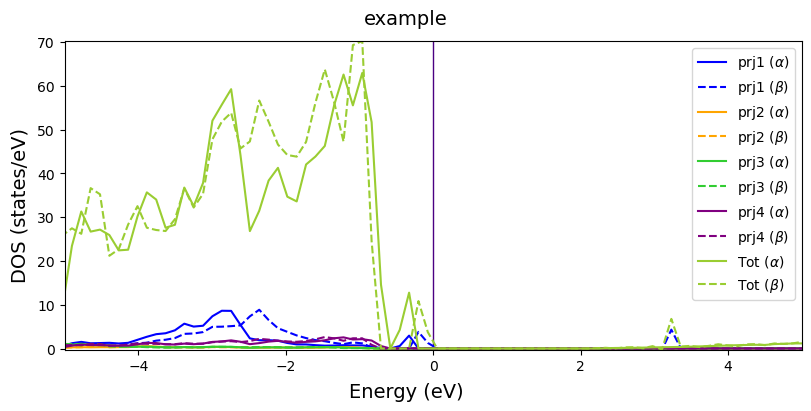

In [18]:
fig, ax = cfplt.plot_electron_doss(
    'doss_ito-cu.DOSS', title='example', figsize=(8, 4), energy_range=[-5, 5],
    fermi_color='indigo', overlap=True, dos_linewidth=1.5,
    dos_color=['blue', 'orange', 'limegreen', 'purple', 'yellowgreen'],
    dos_label=['prj1', 'prj2', 'prj3', 'prj4','Tot'], legend='upper right'
)

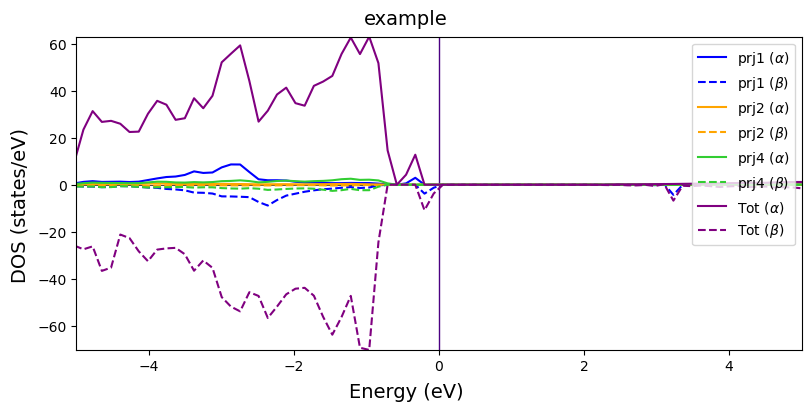

In [19]:
fig, ax = cfplt.plot_electron_doss(
    'doss_ito-cu.DOSS', title='example', figsize=(8, 4), energy_range=[-5, 5],
    fermi_color='indigo', overlap=True, beta='down', dos_linewidth=1.5,
    dos_color=['blue', 'orange', 'limegreen', 'purple'],
    dos_label=['prj1', 'prj2', 'prj4', 'Tot'], prj=[1,2,4,5], legend='upper right'
)

### Electronic Structure

With the plot_electron_banddos() function the user will be able to plot a Band structure along side a DOSS plot as follows:

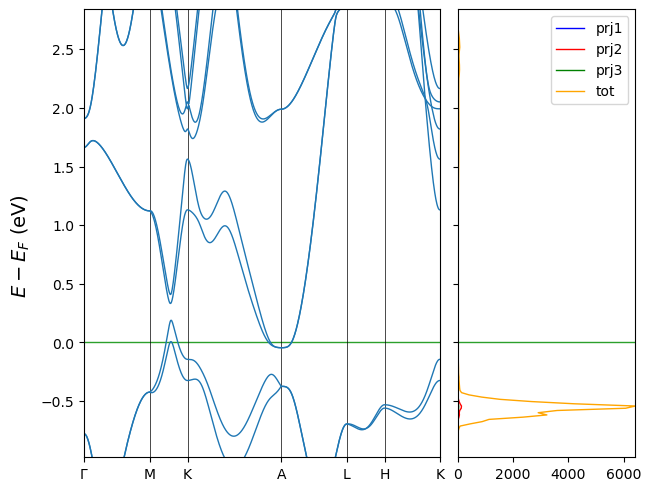

In [2]:
fig, ax = cfplt.plot_electron_banddos(
    'hTaAs_lda_bande44.BAND', 'doss_96.DOSS',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    dos_linestyle=['-', '-', '-', '-'],
    dos_label=['prj1', 'prj2', 'prj3', 'tot'],
    dos_color=['blue', 'red', 'green', 'orange'], legend='upper right'
)

As shown for other functions the user can select an energy range and further customize the plot as follows:

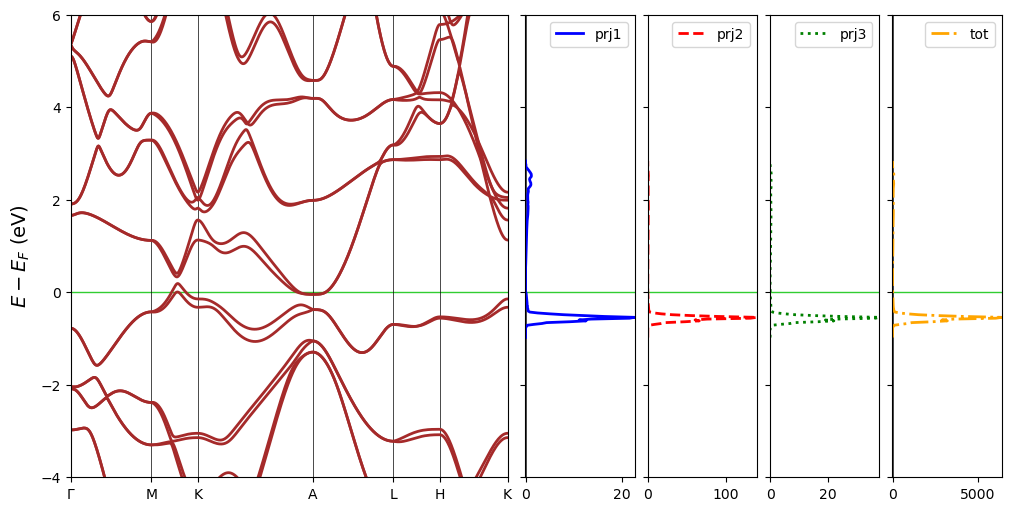

In [4]:
fig, ax = cfplt.plot_electron_banddos(
    'hTaAs_lda_bande44.BAND', 'doss_96.DOSS',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    dos_overlap=False, dos_linewidth=2,
    dos_linestyle=['-', '--', 'dotted', 'dashdot'],
    dos_label=['prj1', 'prj2', 'prj3', 'tot'],
    dos_color=['blue', 'red', 'green', 'orange'],
    band_width=4, band_color='brown', band_linestyle='-', band_linewidth=2,
    fermi_color='limegreen', energy_range=[-4,6], figsize=(10,5),
    legend='upper right'
)

Furthermore you can plot a selection of projections as it happened in the plot_cry_doss() function

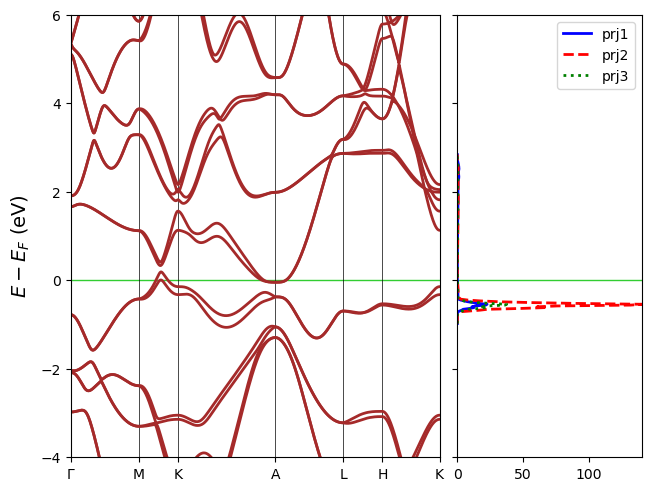

In [8]:
fig, ax = cfplt.plot_electron_banddos(
    'hTaAs_lda_bande44.BAND', 'doss_96.DOSS',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    dos_overlap=True, dos_linewidth=2,
    dos_linestyle=['-', '--', 'dotted'],
    dos_label=['prj1', 'prj2', 'prj3'], dos_prj=[1,2,3],
    dos_color=['blue', 'red', 'green'],
    band_color='brown', band_linestyle='-', band_linewidth=2,
    fermi_color='limegreen', energy_range=[-4,6],
    legend='upper right'
)

At last, the user will be able to restrict the density of state to a maximum range:

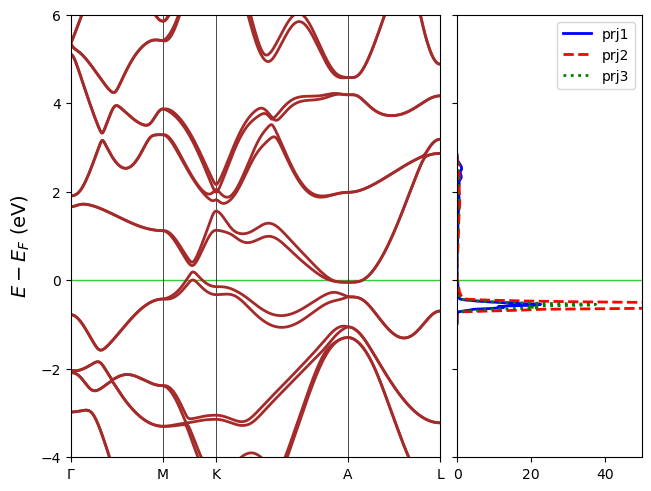

In [10]:
fig, ax = cfplt.plot_electron_banddos(
    'hTaAs_lda_bande44.BAND', 'doss_96.DOSS',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], k_range=['Gamma', 'L'],
    dos_overlap=True, dos_linewidth=2, dos_range=[0, 50],
    dos_linestyle=['-', '--', 'dotted'],
    dos_label=['prj1', 'prj2', 'prj3'], dos_prj=[1,2,3],
    dos_color=['blue', 'red', 'green'],
    band_color='brown', band_linestyle='-', band_linewidth=2,
    fermi_color='limegreen', energy_range=[-4,6],
    legend='upper right'
)